# Evaluate StarDist3D predictions

In [11]:
import os
import numpy as np

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import pandas as pd
from tqdm import tqdm
import numpy as np
import os
from glob import glob
import re

from scipy.ndimage import center_of_mass

import torch

from src.evaluate import get_paths_and_timepoints
from src.evaluate import evaluate_using_centroidsGT, summary_metrics_on_centroidsGT, plot_summary_metrics_on_centroidsGT
from src.evaluate import evaluate_using_masksGT, summary_metrics_on_masksGT, plot_summary_metrics_on_masksGT

We can evaluate the model's predictions using:
- [centroids of the nuclei as ground truth](#centroids-id)
- [manually annotated masks as the ground truth](#masks-id)

### Evaluate using nuclei centroids as ground truth <a id='centroids-id'></a>

#### Define parameters

In [13]:
# Directory where the output metrics will be saved.
output_dir = '/path/to/output/directory/'

# Path to the directory containing the masks predicted by the model
predictions_dir ='/path/to/predictions_directory/'

# The timepoints for the predicted masks will be extracted from the filename using
# the following pattern. Make sure that the timepoints match the timepoints in the ground truth.
# For example, if your files have the following filename format: embryo_t42.tif, the digits (42)
# following the pattern (in this case '_t'), will be extracted.
pattern = '' #uses '_t' by default if pattern is not specified

# Ground truth path: path to a txt file containing the centroids ground truth
# The txt should have the following columns:
    # time: timepoint
    # cell_name: name of the cell (optional, if available)
    # X: X coordinate
    # Y: Y coordinate
    # Z: Z coordinate
centroids_GT_path = '/path/to/txt file with centroids GT/'

# Anisotropy of images in predictions_dir
anisotropy = [4.54, 1, 1]

#### Evaluate model performance

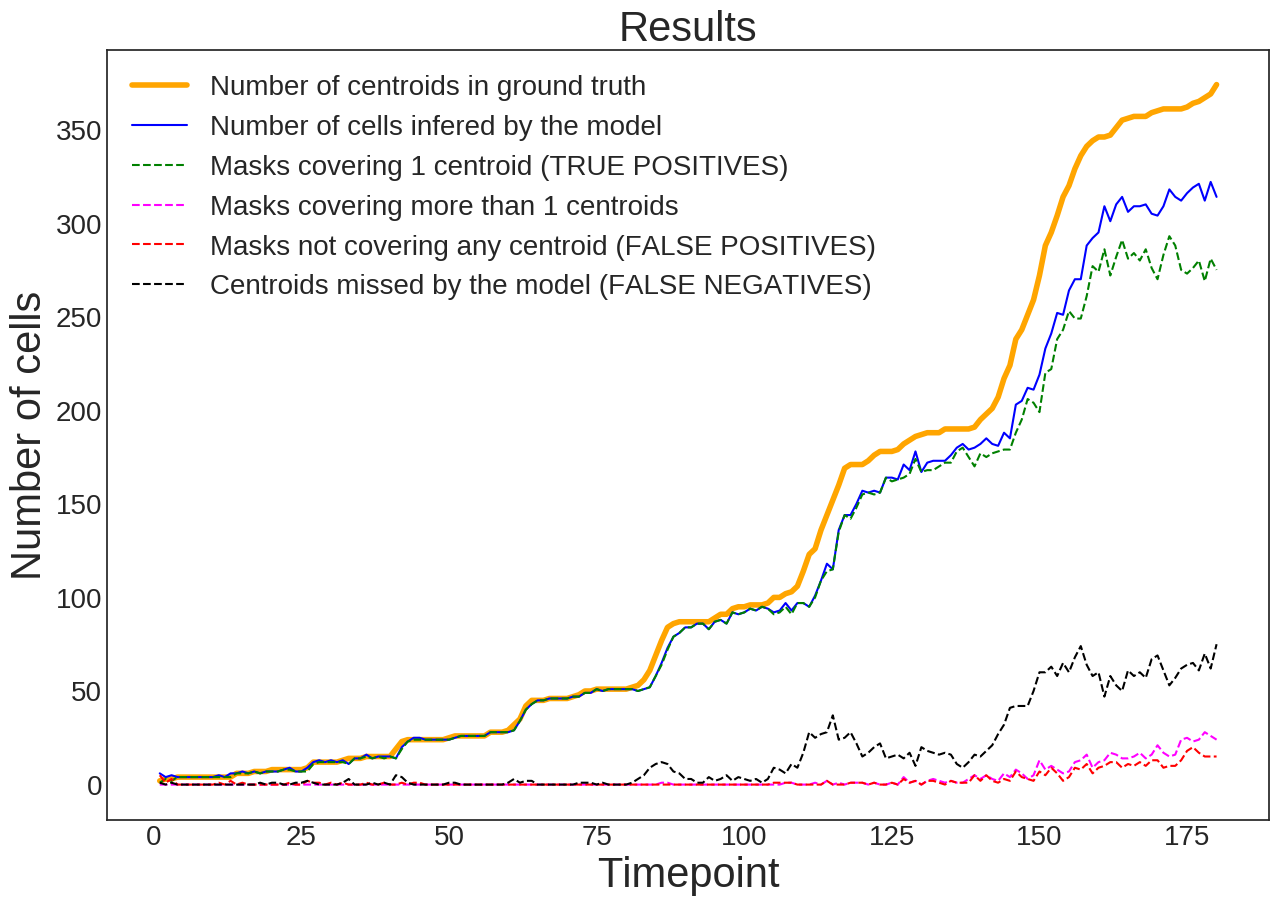

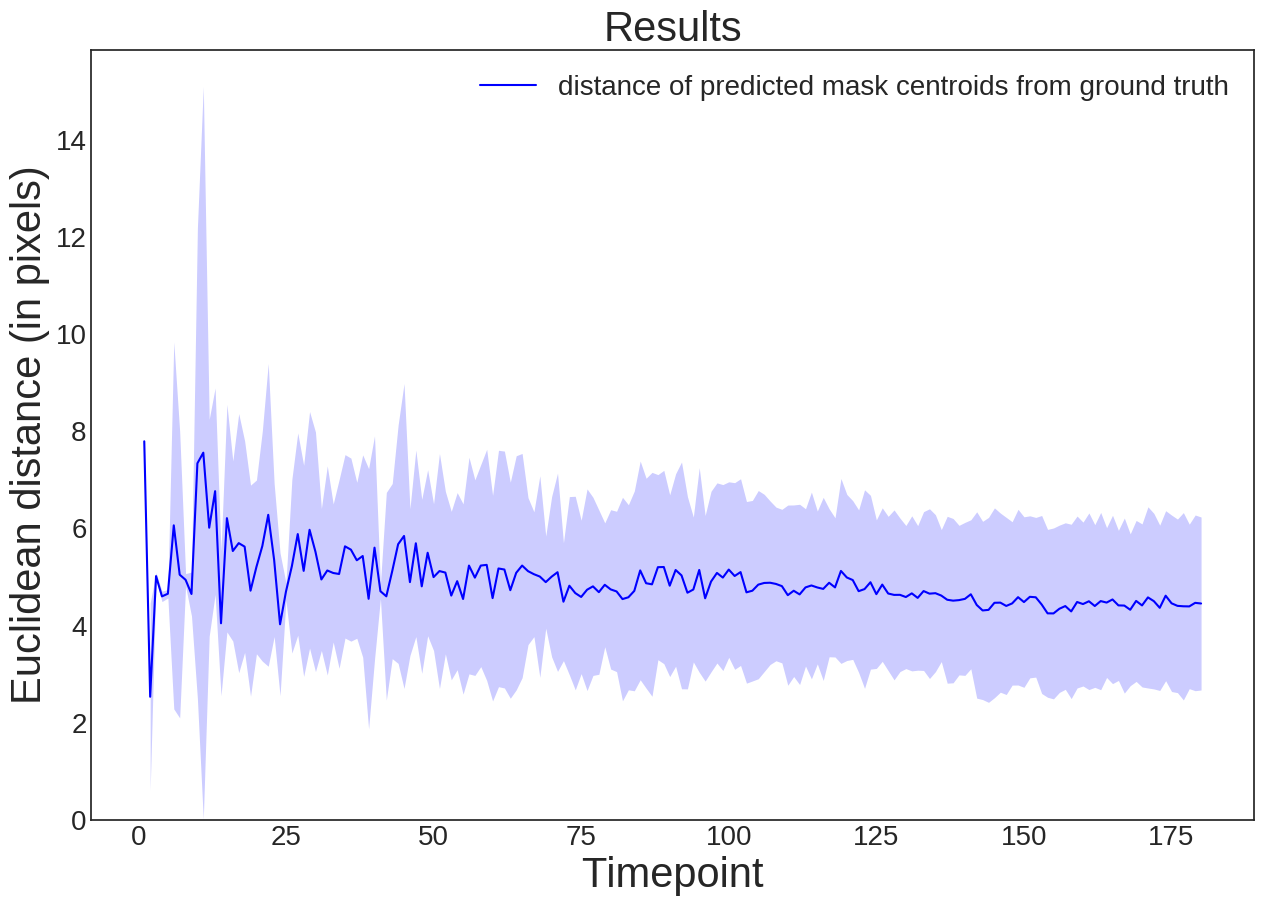

In [14]:
centroidsGT = pd.read_csv(centroids_GT_path,sep='\t')

predictions_paths, timepoints = get_paths_and_timepoints(dir = predictions_dir, pattern = pattern)

# Create export directory if it doesn't exist already
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


model_evaluation_centroidsGT = evaluate_using_centroidsGT(predictions_paths=predictions_paths,
                                                            timepoints=timepoints,
                                                            centroidsGT=centroidsGT,
                                                            anisotropy=anisotropy,
                                                            output_dir=output_dir)

model_evaluation_centroidsGT = pd.read_csv(output_dir + '/evaluation_on_centroidsGT.csv')


summary_metrics_centroidsGT = summary_metrics_on_centroidsGT(model_evaluation_centroidsGT=model_evaluation_centroidsGT,
                                                                centroidsGT=centroidsGT,output_dir=output_dir)

plot_summary_metrics_on_centroidsGT(summary_metrics_centroidsGT = summary_metrics_centroidsGT, output_dir= output_dir)


### Evaluate using nuclei masks as ground truth <a id=masks-id></a>
#### Define parameters

In [16]:
# Directory where the output metrics will be saved.
output_dir = '/path/to/output/directory/'

# Path to the directory containing the masks predicted by the model
predictions_dir = '/path/to/predictions_directory/'

# The timepoints for the predicted masks will be extracted from the filename using
# the following pattern. Make sure that the timepoints match the timepoints in the ground truth.
# For example, if your files have the following filename format: embryo_t42.tif, the digits (42)
# following the pattern (in this case '_t'), will be extracted.
pattern_predictions_dir = '' #uses '_t' by default if pattern is not specified


# Path to the directory contraining the ground truth masks
masks_GT_dir = '/path/to/directory containing ground truth masks/'


# The timepoints for the ground truth masks will be extracted from the filename using
# the following pattern. Make sure that the timepoints match the timepoints in the ground truth.
# For example, if your files have the following filename format: embryo_t42.tif, the digits (42)
# following the pattern (in this case '_t'), will be extracted.
pattern_masks_GT_dir = '' #uses '_t' by default if pattern is not specified


anisotropy = [4.54, 1, 1]

#### Evaluate model performance

Using cuda device to evaluate model performance using masks ground truth.


100%|██████████| 315/315 [00:51<00:00,  6.13it/s]s:  94%|█████████▍| 17/18 [01:34<00:16, 16.18s/it]
Evaluating predicted mask using ground truth masks: 100%|██████████| 18/18 [02:37<00:00,  8.75s/it]


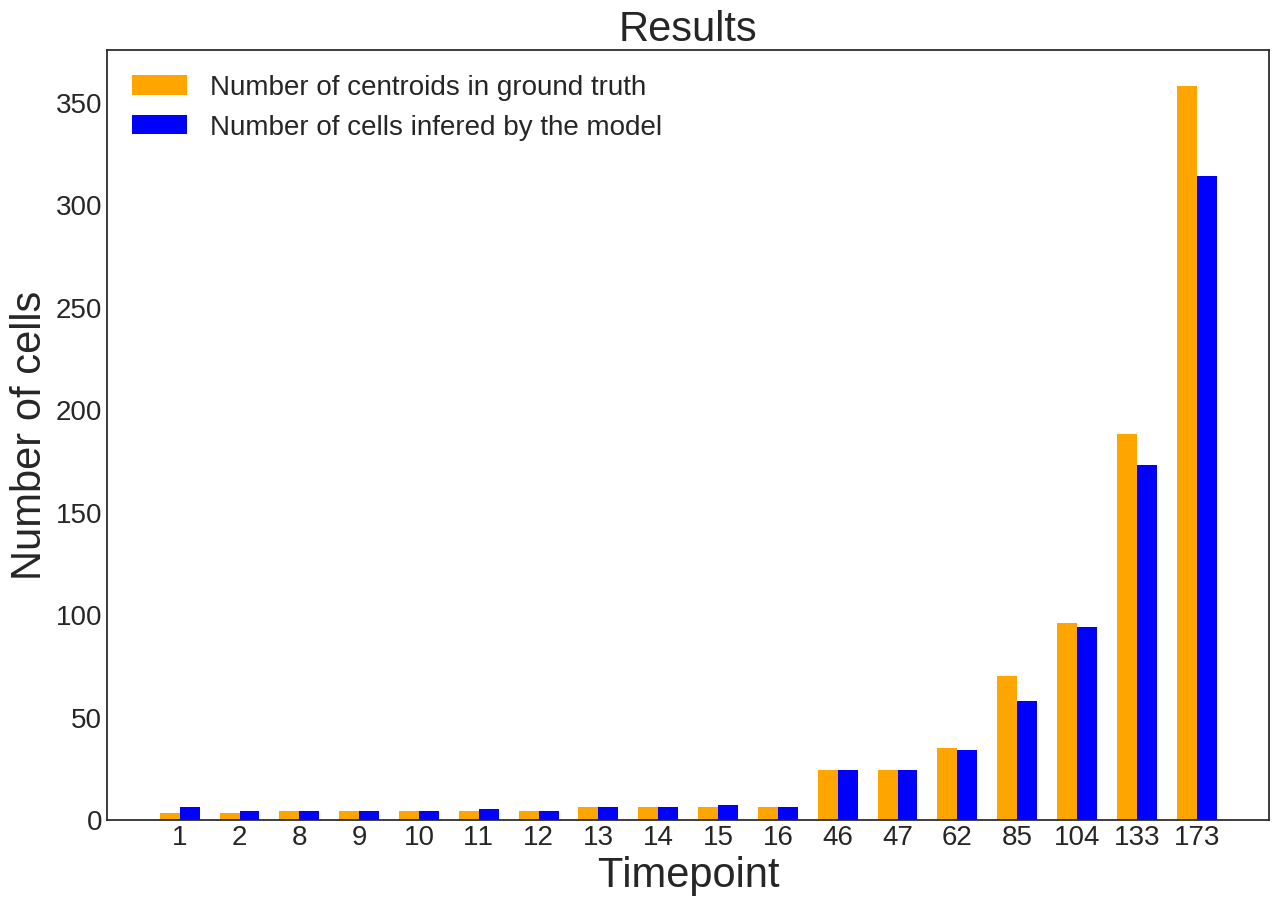

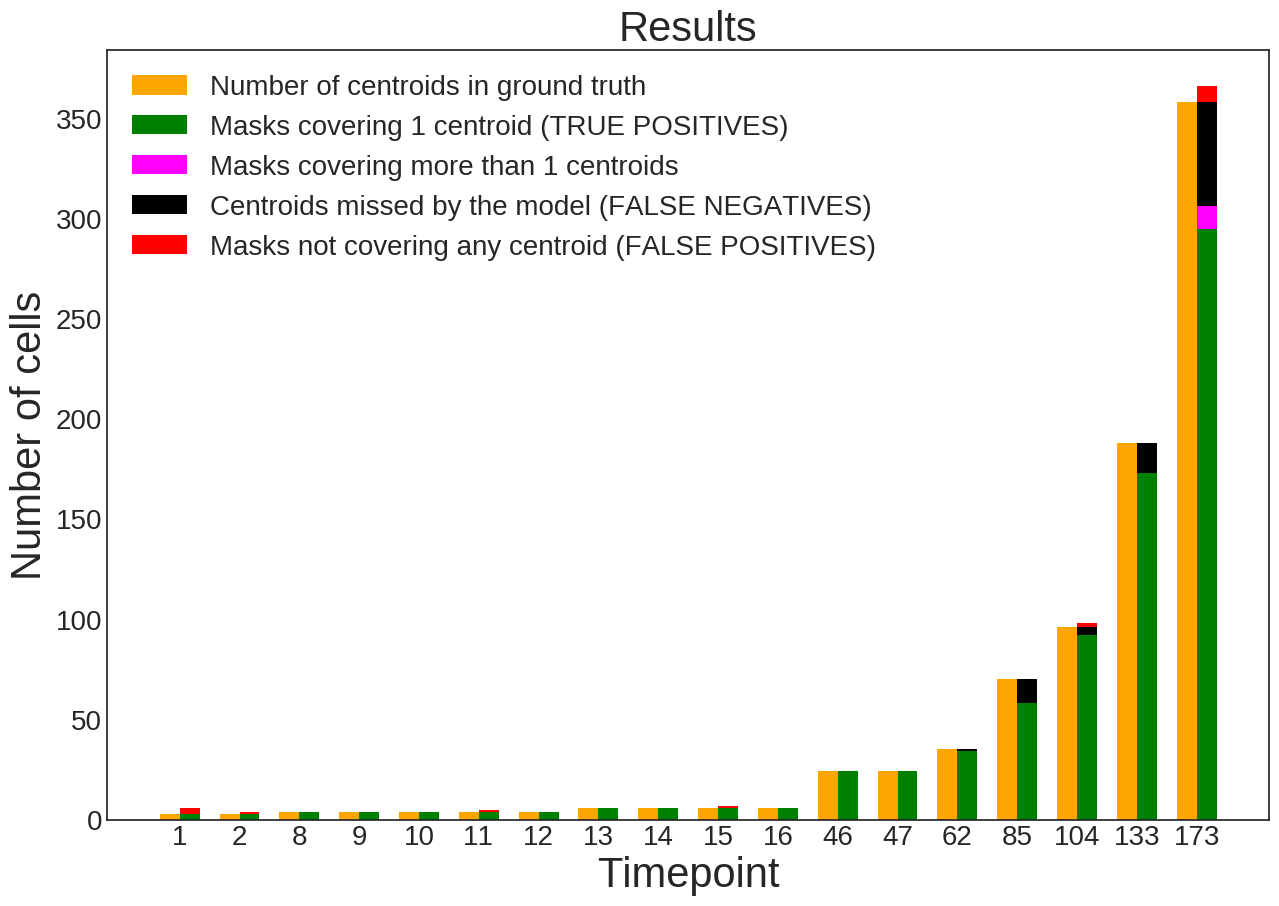

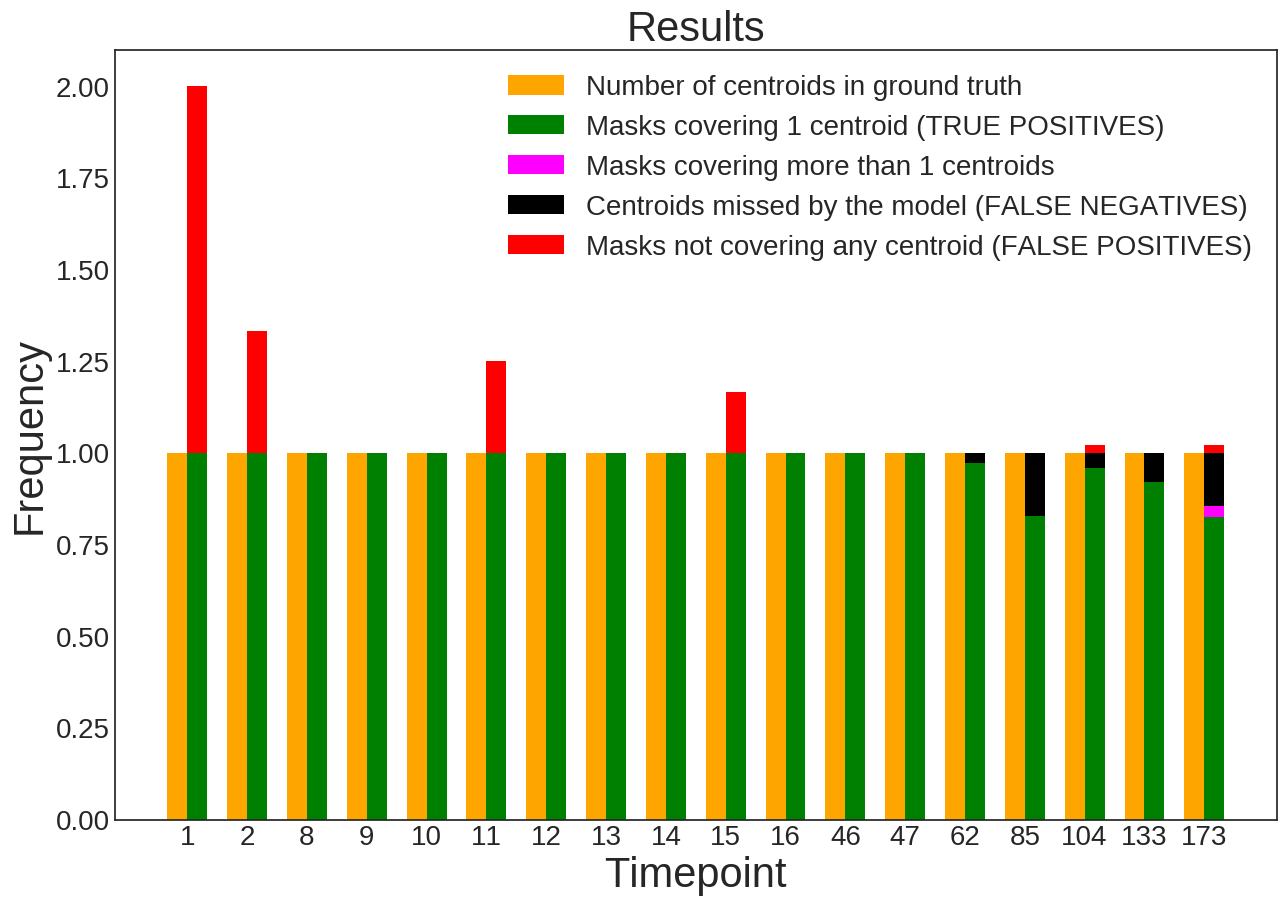

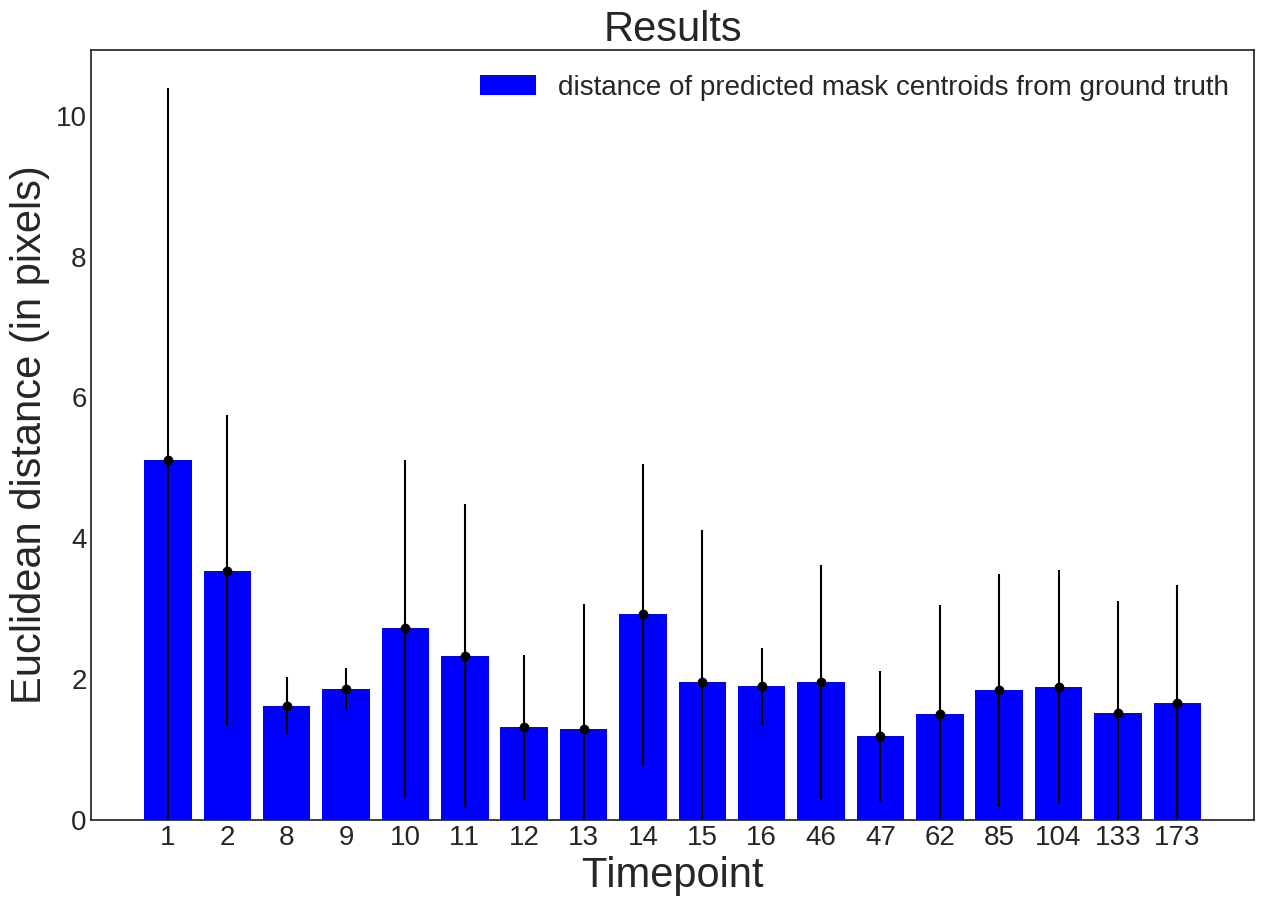

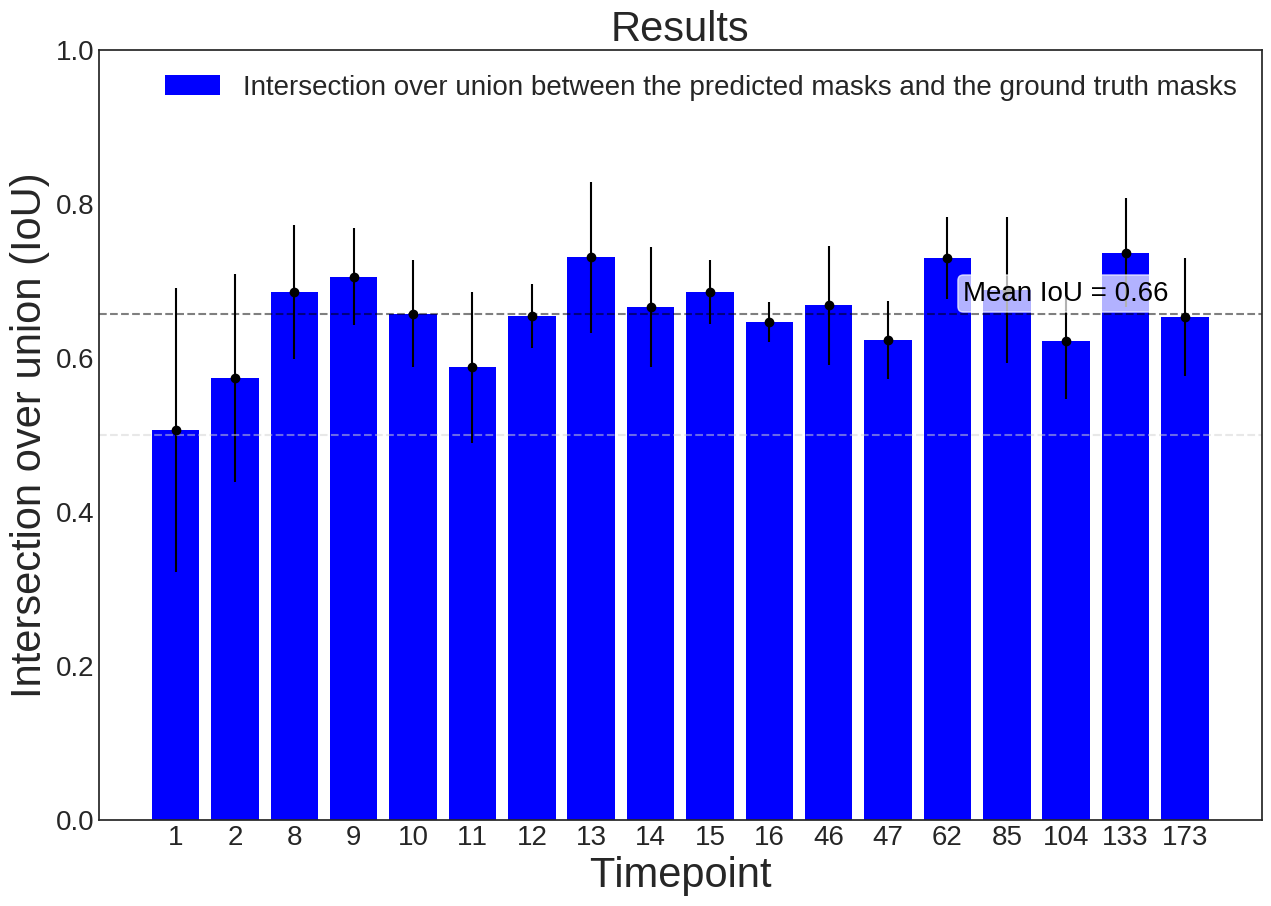

In [17]:
masksGT_paths, masksGT_timepoints = get_paths_and_timepoints(dir = masks_GT_dir)

predictions_paths, predictions_timepoints = get_paths_and_timepoints(dir = predictions_dir)

# Create export directory if it doesn't exist already
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

model_evaluation_masksGT =  evaluate_using_masksGT(predictions_paths=predictions_paths,
                        predictions_timepoints=predictions_timepoints,
                        masksGT_paths=masksGT_paths,
                        masksGT_timepoints=masksGT_timepoints,
                        anisotropy = anisotropy,
                        output_dir=output_dir)

model_evaluation_masksGT = pd.read_csv(output_dir + '/evaluation_on_masksGT.csv')

mask_centroidsGT = pd.read_csv(output_dir + '/Masks_GTcentroids.csv')

summary_metrics_masksGT = summary_metrics_on_masksGT(model_evaluation_masksGT=model_evaluation_masksGT,
                                                        mask_centroidsGT=mask_centroidsGT,
                                                        output_dir=output_dir)

plot_summary_metrics_on_masksGT(summary_metrics_masksGT=summary_metrics_masksGT, output_dir=output_dir)